In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#Load the dataset from hugging face
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#clean the data for date
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df_DS = df[df['job_title_short']=='Data Scientist'].copy()
    

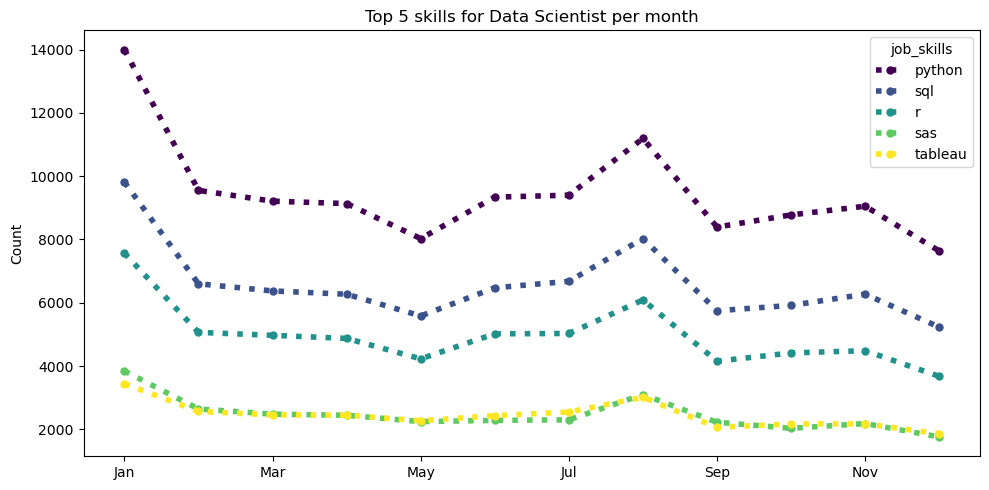

In [24]:
df_DS['job_posted_month_no'] = df_DS['job_posted_date'].dt.month
df_DS_explode = df_DS.explode('job_skills')
df_DS_pivot = df_DS_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DS_pivot.loc['Total'] = df_DS_pivot.sum()
df_DS_pivot = df_DS_pivot[df_DS_pivot.loc['Total'].sort_values(ascending=False).index]
df_DS_pivot = df_DS_pivot.drop('Total')

df_DS_pivot = df_DS_pivot.reset_index()
df_DS_pivot['job_posted_month'] = df_DS_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DS_pivot = df_DS_pivot.set_index('job_posted_month')
df_DS_pivot = df_DS_pivot.drop(columns='job_posted_month_no')

df_DS_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth = 4,
    linestyle = ":",
    colormap='viridis',
    marker = 'o',
    markersize=5,
    figsize=(10, 5)
)
plt.title("Top 5 skills for Data Scientist per month")
plt.ylabel("Count")
plt.xlabel("")
plt.tight_layout()
plt.show()

In [41]:
from adjustText import adjust_text

df_exploded = df_DS.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills','count')
)

skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)


Text(11.472222222222216, 0.5, 'Median yearly salary ($USD)')

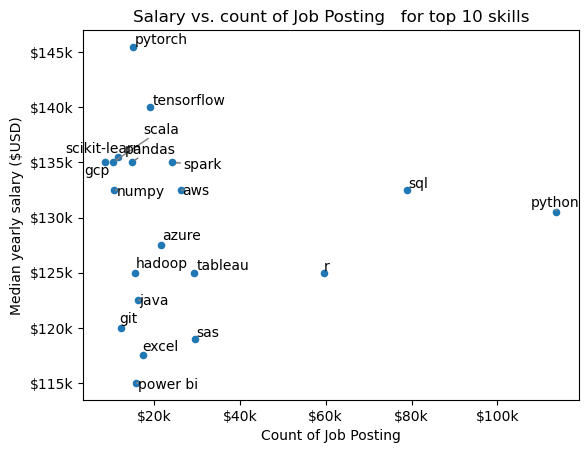

In [54]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))



plt.title('Salary vs. count of Job Posting   for top 10 skills')
plt.xlabel('Count of Job Posting')
plt.ylabel('Median yearly salary ($USD)')